# Capstone Project

# Introduction/Business Problem:

There are several factors associated with the risk of car accidents including traffic, weather conditions, road, etc. My report is focused on developing a model in order to predict the outcome of having an accident and its degree of severity taking in consideration the weather situation, traffic or road problems.
To avoid the regular incidents of car accidents, we'll be deploying a model in order to predict the degree of severity of an accident given the current weather, road and visibility situation. This model would help and assist the drivers to gauge the kind of conditions that can help them avoid situations in order to avoid such accidents.

# Data: 
The data we are using is recorded by Traffic Records division and the information comes from Seattle Police Department that contains data of accidents that happened in the city from the period of 2004 to May,2020. The data that is contained within a csv file is constituted of 37 attributes or features and 194673 rows that contain various samples, the information is labeled and covers road conditions, weather, fatality records etc. 

We have the dependent our target variable as 'SEVERITYCODE' in the dataset which describes the degree of severity of the accident within the data. 
The columns ‘EXCEPTRSNCODE’, ‘PEDROWNOTGRNT’, ‘EXCEPTRSNDESC’, ‘INATTENTIONIND’ and ‘INTKEY’ have more than 50% of missing or null values hence we're gonna drop them from the dataframe. 
We will extract only the attributes we are using to calculate the severity of an accident like 'WEATHER', 'ROADCOND' and 'LIGHTCOND' and COLLISIONTYPE and build our model based on those attributes. 

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np

url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv" #import data
df = pd.read_csv(url)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
df.dtypes #data types

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

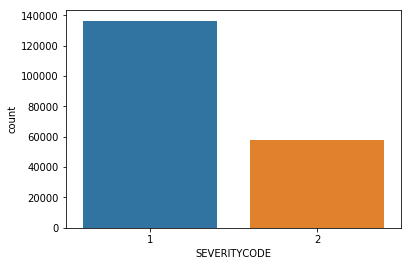

In [3]:
sb.countplot(df['SEVERITYCODE'], data=df)

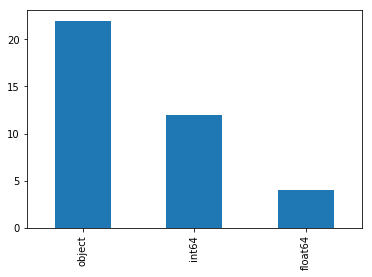

In [4]:
df.dtypes.value_counts().plot(kind='bar')

In [5]:
df.info() #info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
null = df.isnull().sum()
null[0:50]       #checking for null values 

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

As we can observe there are lots of null values in the data, some including more than 50% that we're going to get rid of apart from removing other attributes that are not relevant to our model. We're gonna have to drop these columns- 

INTKEY \
PEDROWNOTGRNT \
EXCEPTRSNDESC \
INATTENTIONIND \
PEDROWNOTGRNT \
SDOTCOLNUM \
SPEEDING \
EXCEPTRSNCODE     

In [7]:
#dropping null or missing values from the data
df1= df.drop(['X','Y','INTKEY','COLDETKEY','REPORTNO','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC',
              'INCDTTM','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND',
              'PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'],axis=1)


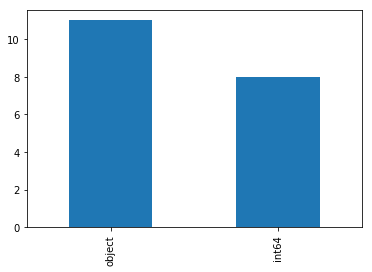

In [8]:
df1.dtypes.value_counts().plot(kind='bar')

In [37]:
null = df1.isnull().sum() 
null[0:15]

SEVERITYCODE         0
OBJECTID             0
INCKEY               0
STATUS               0
ADDRTYPE             0
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE        0
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
JUNCTIONTYPE         0
UNDERINFL         4884
dtype: int64

In [10]:
df1['ST_COLCODE'] = df1['ST_COLCODE'].fillna(0) #replacing null values
df1['SEVERITYCODE'] = df1['SEVERITYCODE'].fillna(0)

df1['ADDRTYPE'] = df1['ADDRTYPE'].fillna(0)
df1['ADDRTYPE'] = df1['ADDRTYPE'].replace(0,'others')

df1['WEATHER'] = df1['WEATHER'].fillna(0)
df1['WEATHER'] = df1['WEATHER'].replace(0,'others')

df1['ROADCOND'] = df1['ROADCOND'].fillna(0)
df1['ROADCOND'] = df1['ROADCOND'].replace(0,'others')

df1['LIGHTCOND'] = df1['LIGHTCOND'].fillna(0)
df1['LIGHTCOND'] = df1['LIGHTCOND'].replace(0,'others')

df1['COLLISIONTYPE'] = df1['COLLISIONTYPE'].fillna(0)
df1['COLLISIONTYPE'] = df1['COLLISIONTYPE'].replace(0,'others')

df1['JUNCTIONTYPE'] = df1['JUNCTIONTYPE'].fillna(0)
df1['JUNCTIONTYPE'] = df1['JUNCTIONTYPE'].replace(0,'others')

In [11]:
Null_values = df1.isnull().sum() 
Null_values[0:15]

SEVERITYCODE         0
OBJECTID             0
INCKEY               0
STATUS               0
ADDRTYPE             0
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE        0
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
JUNCTIONTYPE         0
UNDERINFL         4884
dtype: int64

In [12]:
df1.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,1,1307,Matched,Intersection,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),N,Overcast,Wet,Daylight,10
1,1,2,52200,Matched,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11
2,1,3,26700,Matched,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32
3,1,4,1144,Matched,Block,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,23
4,2,5,17700,Matched,Intersection,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),0,Raining,Wet,Daylight,10


Text(0.5, 1.0, 'Annual car accidents by severity')

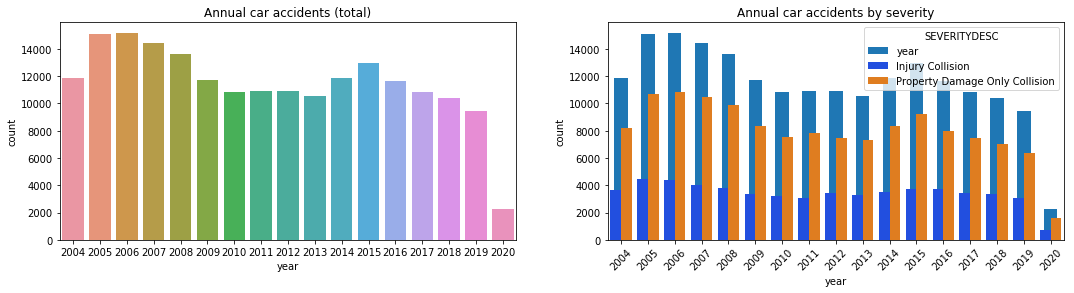

In [13]:
# plotting annual accidents by severity
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 4))

df1['year'] = pd.DatetimeIndex(df1['INCDATE']).year
df1['year'].value_counts().sort_index().plot(kind='bar')
sb.countplot(x="year", data=df1, ax=ax1)
sb.countplot(x="year", hue="SEVERITYDESC", data=df1, ax=ax2,palette="bright")
plt.xticks(rotation=45)
ax1.set_title('Annual car accidents (total)')
ax2.set_title('Annual car accidents by severity')

The data is till May hence the less number of accidents recorded for 2020, there's higher possibility of property damage caused due to accidents rather than injury based.

In [14]:
#accident types
df1['COLLISIONTYPE'].value_counts().sort_values(ascending=False).to_frame()  

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
others,4904
Right Turn,2956


In [15]:
# Accidents due to weather conditions
df1['WEATHER'].value_counts().sort_values(ascending=False).to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
others,5081
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56


It can be seen that the most accident occurences have happened in 'Clear' weather situations unlike the common perception. This tells us weather is not as much responsible and indicative of having accidents as we thought it was, there's likely possible that drivers are less likely to pay attention on roads/drive rashly while its clear weather.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

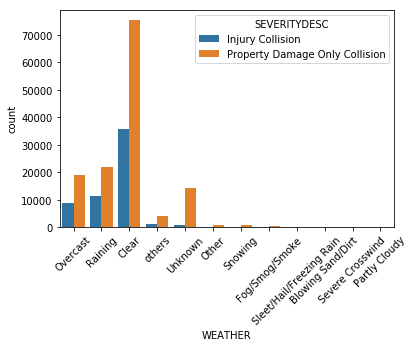

In [16]:
sb.countplot(x="WEATHER", hue="SEVERITYDESC", data=df1)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

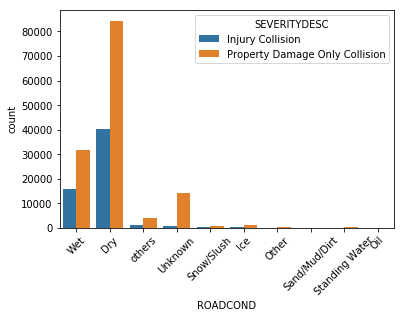

In [17]:
# Accidents due to road conditions

sb.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df1)
plt.xticks(rotation=45)

We can observe that the most number of accidents happened in 'Dry' road conditions hence no big correlation b/w road conditions and accidents 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

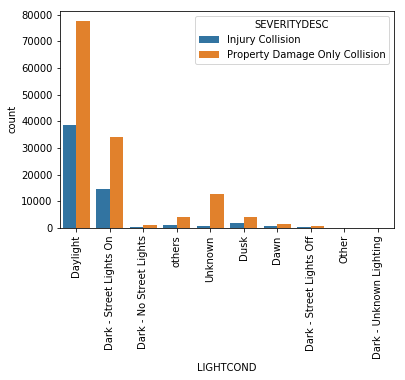

In [18]:
# Accidents due to lighting conditions

sb.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df1)
plt.xticks(rotation=90)

We can observe that the most number of accidents happened in 'Daylight' road conditions hence no big correlation b/w lighting on roads and accidents 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

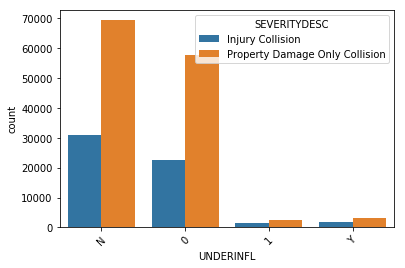

In [19]:
# Whether driver was under an influence of drug or alcohol¶

sb.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df1)
plt.xticks(rotation=45)

As we can observe most accidents ocurred under 'N' showing the driver was not under any influence of intoxicants while driving. All in all, it can be concluded that a majority of these accidents were no-injury based accidents happened under fairly normal driving conditions with little to no outside influences.

# Methodology


In [20]:
# Data preparation and cleaning

dt= df1[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE']]
dt= dt.dropna()
dt.shape

(189789, 6)

In [21]:
dt.head(10)


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SEVERITYCODE
0,Angles,Overcast,Wet,Daylight,N,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,0,1
2,Parked Car,Overcast,Dry,Daylight,0,1
3,Other,Clear,Dry,Daylight,N,1
4,Angles,Raining,Wet,Daylight,0,2
5,Angles,Clear,Dry,Daylight,N,1
6,Angles,Raining,Wet,Daylight,0,1
7,Cycles,Clear,Dry,Daylight,N,2
8,Parked Car,Clear,Dry,Daylight,0,1
9,Angles,Clear,Dry,Daylight,0,2


In [22]:
# converting categorical to numeric variables

dt['UNDERINFL'].replace(to_replace=['N','Y','0'], value=[0,1,0],inplace=True)
dt['UNDERINFL'].value_counts()

0    180668
1      9121
Name: UNDERINFL, dtype: int64

In [23]:
#encoding

from sklearn.preprocessing import LabelEncoder

ft = dt[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL']]

for f in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    ft[f] = ft[f].astype('|S') 
    ft[f] = LabelEncoder().fit_transform(ft[f])

ft.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,4,8,5,0
1,9,6,8,2,0
2,5,4,0,5,0
3,4,1,0,5,0
4,0,6,8,5,0


In [24]:
X = ft
y = dt['SEVERITYCODE'].values

In [25]:
# Train-Test split and data normalization
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
7376,5,4,0,5,0
154616,0,4,0,6,0
58934,5,1,0,5,0
131347,7,6,8,5,0
39968,3,1,0,5,0


In [26]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]
X_test[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.54222045, -0.73188063, -0.71507947,  0.34017641, -0.22250979],
       [ 0.17505856, -0.73188063, -0.71507947, -1.39412018, -0.22250979],
       [-1.61813895,  1.00590628,  1.47367983, -1.39412018, -0.22250979],
       [ 0.17505856, -0.03676587,  1.20008492,  2.07447301, -0.22250979],
       [ 0.89233756,  1.00590628,  1.47367983,  0.34017641, -0.22250979]])

In [27]:
# Modeling and evaluation
# knn method
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
knn



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [28]:
# logistic regression method
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.0001, solver='liblinear')
lr.fit(X_train, y_train)
lr

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree.fit(X_train, y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# Model evalutaion
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import precision_score

# KNN
yhat1 = knn.predict(X_test)
kn = yhat1
print("Train set KNN Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(y_test, yhat1))
jaccard = jaccard_similarity_score(y_test, yhat1)
precision = precision_score(y_test, yhat1, average='weighted')
knn_final = ['KNN', round(jaccard,2), round(precision,2)]

# Decission tree 
yhat1 = tree.predict(X_test)
tr = yhat1
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(y_train, tree.predict(X_train)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat1))
jaccard = jaccard_similarity_score(y_test, yhat1)
precision_tree = precision_score(y_test, yhat1, average='weighted')
tree_final = ['Decision Tree', round(jaccard,2),round(precision_tree,2)]

# Logistic regression
yhat_proba = lr.predict_proba(X_test)
yhat1 = lr.predict(X_test)
yhat_lr = yhat1
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat1))
jaccard = jaccard_similarity_score(y_test, yhat1)
precision_lr = precision_score(y_test, yhat1, average='weighted')
lr_final = ['Logistic Regression', round(jaccard,2),round(precision_lr,2)]

Train set KNN Accuracy:  0.682285550838527
Test set KNN Accuracy:  0.7259251453360732
Train set Decission Tree Accuracy:  0.7488107066510101
Test set Decission Tree Accuracy:  0.748142684019179
Train set Logistic regression Accuracy:  0.6994249239755518
Test set Logistic regression Accuracy:  0.6989655232976799


In [31]:
final = pd.DataFrame(data=np.array([knn_final, tree_final, lr_final]),                                      
                      columns=['Algorithm', 'Jaccard', 'Precision'])
final

,Algorithm,Jaccard,Precision
0,KNN,0.73,0.7
1,Decision Tree,0.75,0.77
2,Logistic Regression,0.7,0.68


In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Score:',accuracy_score(rf_pred, y_test))

Score: 0.7461404710469466


In [38]:
print('RF Score:',accuracy_score(rf_pred, y_test))
print('LR Score:',accuracy_score(yhat_lr, y_test))
print('DT Score:',accuracy_score(tr, y_test))
print('KNN Score:',accuracy_score(kn, y_test))

RF Score: 0.7461404710469466
LR Score: 0.6989655232976799
DT Score: 0.748142684019179
KNN Score: 0.7259251453360732


In conclusion out of deploying the classification algorithms, the best classifier seems to be **Decision Tree** with the highest positive accuracy score.

In [34]:
# KNN Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, kn))

[[36640  3119]
 [12486  4692]]


In [35]:
# Decision tree Confusion matrix

print(confusion_matrix(y_test, tr))

[[39133   626]
 [13714  3464]]


In [36]:
# Logistic regression Confusion matrix

print(confusion_matrix(y_test, yhat_lr))

[[39714    45]
 [17095    83]]


We find the confusion matrix for the given algorithms, reveals the number of samples that were rightly classified. ‘A confusion matrix is a table that is used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.’ We note variation that occurs while comparing false positives & true positives while true negatives & false negatives seem stable.

# Discussion and Conclusion-

In this notebook we employed a number of libraries(mainly pandas, numpy) to interpret,modify and understand the dataset in order to identify the severity of accidents or type of accidents happening during road collisions. The major objective of our project was to predict whether these accidents are caused due to changes in weather conditions, roads, drugs influence, lighting etc. and to find out the severity of these accidents so as to help the drivers avoid such mishappenings.

We find out the missing values, clean the data and apply various data visualisation tools to interpret the data, plot various findings, used label encoding to create new class. Finally we processed our cleaned data through 3 main ML algoriths, K-Nearest Neighbor, Decision Tree and Logistic Regression. We further employ these algorithms to build a model and get optimal values to predict the outcome of the analysis.

The three models we used were almost similar in performance, but Decision Tree provided the best possible accuracy score for the dataset.
